In [1]:
#importing the needed libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#reading the data into a dataframe
emissions = pd.read_csv("c02_emission_canada.csv")

In [3]:
#checking the properties of each column
emissions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2222 entries, 0 to 2221
Data columns (total 9 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              2222 non-null   object 
 1   Model                             2222 non-null   object 
 2   Vehicle Class                     2222 non-null   object 
 3   Engine Size(L)                    2222 non-null   float64
 4   Cylinders                         2222 non-null   int64  
 5   Transmission                      2222 non-null   object 
 6   Fuel Type                         2222 non-null   object 
 7   Fuel Consumption Comb (L/100 km)  2222 non-null   float64
 8   CO2 Emissions(g/km)               2222 non-null   int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 156.4+ KB


<h1>Brief data intro</h1>
"Make" - The company that manufactures the vehicle.<br>
"Model" - The vehicle's model.<br>
"Vehicle Class" - Vehicle class by utility, capacity, and weight.<br>
"Engine Size(L)" - The engine's displacement in liters.<br>
"Cylinders" - The number of cylinders.<br>
"Transmission" - The transmission type: A = Automatic, AM = Automatic Manual, AS = Automatic with select shift, AV = Continuously variable, M = Manual, 3 - 10 = the number of gears.<br>
"Fuel Type" - The fuel type: X = Regular gasoline, Z = Premium gasoline, D = Diesel, E = Ethanol (E85), N = natural gas.<br>
"Fuel Consumption Comb (L/100 km)" - Combined city/highway (55%/45%) fuel consumption in liters per 100 km (L/100 km).<br>
"CO2 Emissions(g/km)" - The tailpipe carbon dioxide emissions in grams per kilometer for combined city and highway driving.<br>

In [4]:
#getting the first five data fro the data frame
emissions.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [5]:
#renaming the column titles
emissions.rename(columns = {"Vehicle Class":"VehicleClass", "Engine Size(L)": "EngineSize", "Fuel Type":"FuelType", "Fuel Consumption Comb (L/100 km)":"FuelConsumption", "CO2 Emissions(g/km)":"CO2Emissions"}, inplace = True)
emissions.head()

,Make,Model,VehicleClass,EngineSize,Cylinders,Transmission,FuelType,FuelConsumption,CO2Emissions
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,10.6,244


In [8]:
#checking out the data contents
emissions.describe().T

,count,mean,std,min,25%,50%,75%,max
EngineSize,2222.0,3.265482,1.389454,1.0,2.0,3.0,4.000,8.4
Cylinders,2222.0,5.710621,1.817535,3.0,4.0,6.0,6.000,12.0
FuelConsumption,2222.0,11.277363,3.249218,4.7,8.9,10.7,12.875,26.1
CO2Emissions,2222.0,251.753825,61.535728,108.0,205.0,244.0,290.000,488.0


In [9]:
#obtaining the median of the engine size in litres
np.median(emissions["EngineSize"])

3.0

In [8]:
#obtaining the average fuel comsumption of all the fuel types
print(emissions.groupby(["FuelType"])["FuelConsumption"].mean())

FuelType
D     8.340000
E    17.574359
X    10.279924
Z    11.530995
Name: FuelConsumption, dtype: float64
6.45


In [13]:
#obtaining the average fuel consumption by make
print(emissions.groupby(["Make"])["FuelConsumption"].mean().sort_values())

Make
SMART             6.450000
FIAT              7.978261
MINI              8.175000
ALFA ROMEO        8.400000
MAZDA             8.450000
HONDA             8.500000
SCION             8.737500
VOLKSWAGEN        8.861446
MITSUBISHI        9.145455
KIA               9.414865
SUBARU            9.465909
ACURA             9.476667
HYUNDAI           9.525424
TOYOTA           10.181915
VOLVO            10.543750
LEXUS            10.612245
NISSAN           10.716901
BMW              10.757764
BUICK            10.837500
JEEP             10.946575
INFINITI         11.056098
PORSCHE          11.208571
AUDI             11.390476
LINCOLN          11.741667
CHRYSLER         11.900000
MERCEDES-BENZ    11.990517
DODGE            11.991358
FORD             12.074545
CADILLAC         12.425000
CHEVROLET        12.695858
RAM              13.226667
JAGUAR           13.228889
MASERATI         13.891667
LAND ROVER       14.935484
ASTON MARTIN     15.200000
BENTLEY          15.573333
GMC              15.859

In [14]:
#calculating the correlation between co2 emissions and fuel consumptions
emissions[["FuelConsumption", "CO2Emissions"]].corr()

,FuelConsumption,CO2Emissions
FuelConsumption,1.000000,0.901594
CO2Emissions,0.901594,1.000000


CO2Emissions and fuel consumption is positively correlated, that is, vehicles with higher fuel consumption most likely emitt more CO2 than others with lower fuel consumption.

In [18]:
#average of co2 emission by vehicle class
avg_co2_by_vehicle = emissions.groupby(["VehicleClass"])["CO2Emissions"].mean()
avg_co2 = pd.DataFrame(data=avg_co2_by_vehicle, index=None, columns=["CO2Emissions"])
avg_co2 =  avg_co2.reset_index()
avg_co2.sort_values("CO2Emissions")

,VehicleClass,CO2Emissions
9,STATION WAGON - SMALL,211.070423
0,COMPACT,217.130194
2,MID-SIZE,223.271468
8,STATION WAGON - MID-SIZE,228.142857
7,SPECIAL PURPOSE VEHICLE,233.437500
3,MINICOMPACT,238.194444
11,SUV - SMALL,238.955621
10,SUBCOMPACT,243.675159
4,MINIVAN,259.827586
13,TWO-SEATER,268.451220


VAN-PASSENGER vehicles have the most co2 emissions

In [19]:
#comparing the co2 emissions avg between suv-small and mid size
list(avg_co2[avg_co2["VehicleClass"] == "SUV - SMALL"]["CO2Emissions"])>list(avg_co2[avg_co2["VehicleClass"] == "MID-SIZE"]["CO2Emissions"])

True

The above shows that the average co2 emission of suv-small is greater than that of mid size vehicle

In [20]:
#calculating the average co2 emissions for all vehicles
avg_co2_for_all = emissions["CO2Emissions"].mean()
print(f"The averahe co2 emission for all vehicles is {avg_co2_for_all}")

The averahe co2 emission for all vehicles is 251.75382538253825


In [21]:
enginelt2 = emissions[(emissions["EngineSize"] < 2.0 )| (emissions["EngineSize"] == 2.0)]
print(f'The average co2 emission of vehicles with engine size less than or equal to 2 is {enginelt2["CO2Emissions"].mean()}')

The average co2 emission of vehicles with engine size less than or equal to 2 is 195.16005873715125


In [22]:
import seaborn as sns

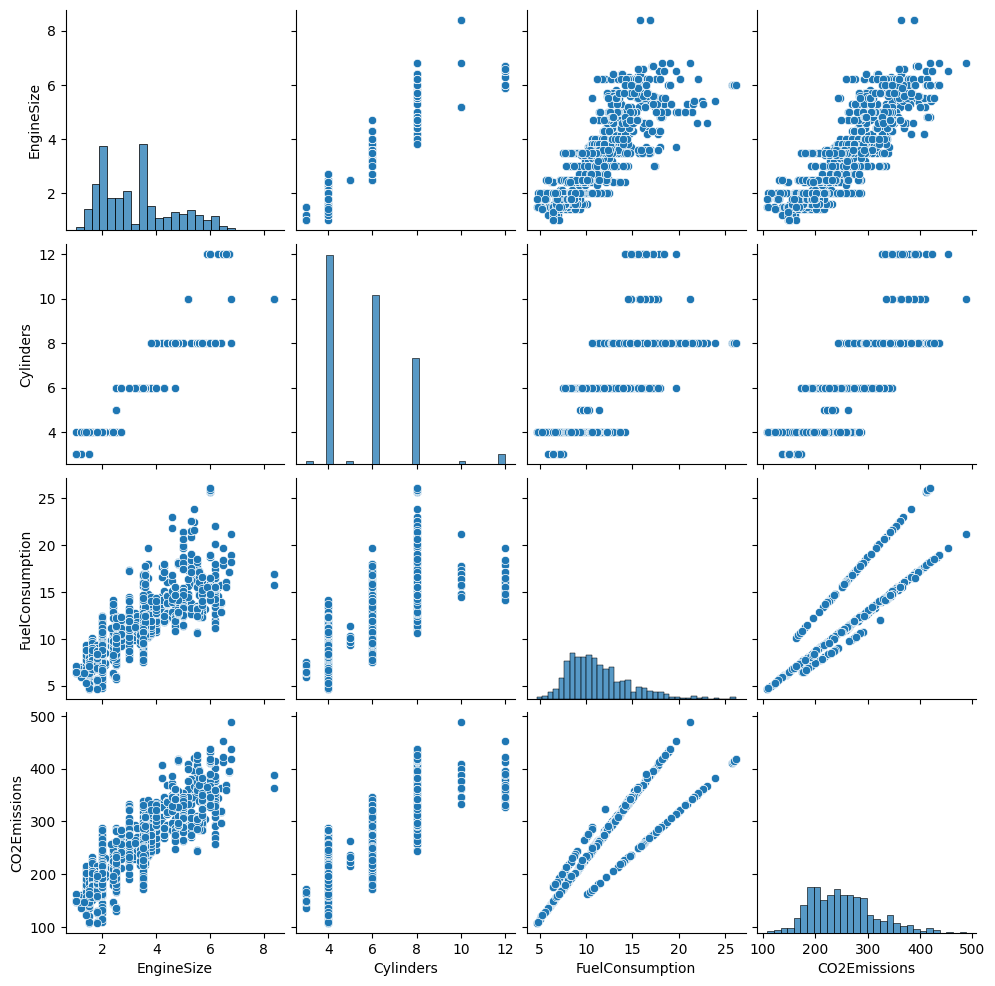

In [23]:
#creating a pairplot to understand the relationship between each columns
sns.pairplot(emissions)

From the pairplot it was observed that:
<br>The larger the engine size the higher the co2 emissions, that is vehicles with larger engine size consume more co2.
<br>The larger the engine size the larger the fuel consumption, that is, vehicles with larger engine size consume more fuel.
<br>Fuel consumption and CO2 emission are positively correlated which invariably means that vehicles that consume more fuel have higher co2 emissions.

<AxesSubplot: xlabel='CO2Emissions', ylabel='EngineSize'>

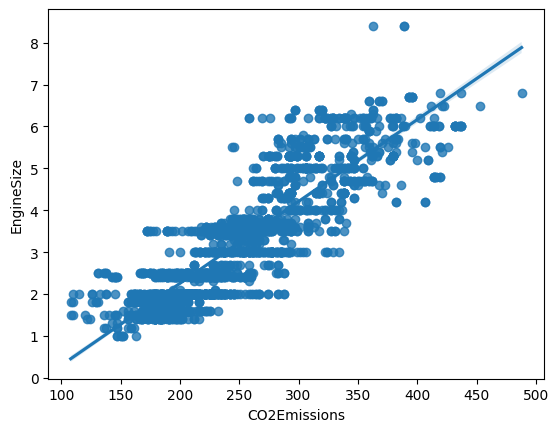

In [24]:
#to show the relatinship between engine size and co2 consumption
sns.regplot(data=emissions, x= "CO2Emissions", y= "EngineSize")

<AxesSubplot: xlabel='CO2Emissions', ylabel='Cylinders'>

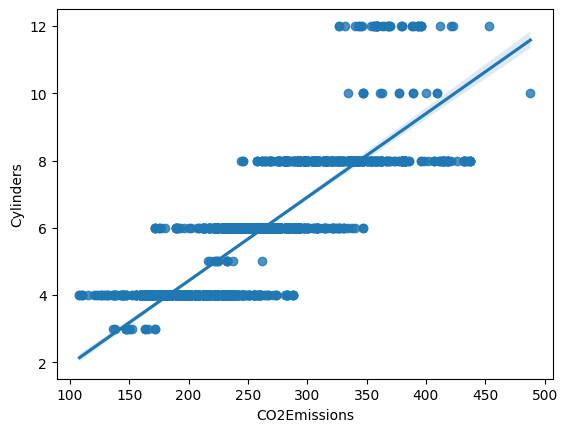

In [25]:
#to show the relationship between the number of cylinders and co2 emission
sns.regplot(data=emissions, x= "CO2Emissions", y= "Cylinders")

In [32]:
#grouping fuel type by the co2emissions
emissions.groupby(["FuelType"])["CO2Emissions"].mean()

FuelType
D    224.816667
E    281.160256
X    236.442436
Z    265.493194
Name: CO2Emissions, dtype: float64

In [33]:
#grouping vehicles by cylinders and fuel consumption
emissions.groupby(["Cylinders"])["FuelConsumption"].mean()

Cylinders
3      6.678571
4      8.765005
5      9.969231
6     11.640617
8     15.215632
10    16.400000
12    16.125000
Name: FuelConsumption, dtype: float64

In [34]:
#enginsize and co2 emsissions
emissions.groupby(["EngineSize"])["FuelConsumption"].mean()

EngineSize
1.0     6.585714
1.2     6.537500
1.3     6.300000
1.4     7.921538
1.5     6.964286
1.6     8.265873
1.8     7.834177
2.0     9.008197
2.1     7.900000
2.3     9.925000
2.4     9.565942
2.5     9.127826
2.7    10.572000
3.0    10.924138
3.2    11.033333
3.3    11.521429
3.4    10.366667
3.5    11.132164
3.6    12.552778
3.7    12.183333
3.8    11.631111
4.0    13.063415
4.2    14.883333
4.3    14.844444
4.4    13.542857
4.6    15.043750
4.7    13.780952
4.8    15.142857
5.0    15.019444
5.2    15.927273
5.3    16.691667
5.4    19.637500
5.5    14.156000
5.6    14.950000
5.7    14.340625
5.8    13.200000
5.9    15.600000
6.0    18.557500
6.2    15.105085
6.3    15.050000
6.4    13.945455
6.5    18.575000
6.6    15.900000
6.7    17.150000
6.8    19.466667
8.4    16.533333
Name: FuelConsumption, dtype: float64

In [35]:
emissions.groupby(["EngineSize"])["CO2Emissions"].mean()

EngineSize
1.0    151.571429
1.2    150.375000
1.3    145.000000
1.4    182.169231
1.5    160.107143
1.6    190.047619
1.8    180.316456
2.0    207.199454
2.1    213.500000
2.3    228.500000
2.4    215.398551
2.5    209.965217
2.7    243.360000
3.0    256.637931
3.2    253.800000
3.3    264.928571
3.4    238.300000
3.5    248.432749
3.6    264.022222
3.7    269.850000
3.8    267.622222
4.0    302.073171
4.2    342.416667
4.3    287.333333
4.4    311.333333
4.6    326.437500
4.7    317.690476
4.8    349.619048
5.0    311.458333
5.2    368.636364
5.3    316.972222
5.4    373.375000
5.5    325.600000
5.6    343.916667
5.7    329.750000
5.8    304.000000
5.9    360.200000
6.0    391.525000
6.2    337.406780
6.3    353.500000
6.4    320.727273
6.5    427.250000
6.6    365.666667
6.7    394.500000
6.8    448.000000
8.4    380.333333
Name: CO2Emissions, dtype: float64

In [36]:
emissions.groupby(["FuelType"])["FuelConsumption"].mean()

FuelType
D     8.340000
E    17.574359
X    10.279924
Z    11.530995
Name: FuelConsumption, dtype: float64

In [37]:
emissions.groupby(["Cylinders"])["CO2Emissions"].mean()

Cylinders
3     153.571429
4     201.056338
5     229.076923
6     259.150134
8     328.276231
10    378.933333
12    372.250000
Name: CO2Emissions, dtype: float64

In [40]:
model_by_emission = emissions.groupby(["Model"])["CO2Emissions"].mean()
model_by_emission = pd.DataFrame(data=model_by_fuel, index=None, columns=["CO2Emissions"])
model_by_emission = model_by_emission.reset_index()
model_by_emission[model_by_emission["CO2Emissions"] == max(model_by_emission["CO2Emissions"])]

,Model,CO2Emissions
324,E350 WAGON,488.0


In [43]:
model_by_emission[model_by_emission["CO2Emissions"] == min(model_by_emission["CO2Emissions"])]

,Model,CO2Emissions
588,PRIUS,109.0
589,PRIUS c,109.0


In [44]:
model_by_fuel = emissions.groupby(["Model"])["FuelConsumption"].mean()
model_by_fuel = pd.DataFrame(data=model_by_fuel, index=None, columns=["FuelConsumption"])
model_by_fuel = model_by_fuel.reset_index()
model_by_fuel[model_by_fuel["FuelConsumption"] == max(model_by_fuel["FuelConsumption"])]

,Model,FuelConsumption
368,EXPRESS 3500 PASSENGER FFV,22.55
714,SAVANA 3500 PASSENGER FFV,22.55


In [45]:
model_by_fuel[model_by_fuel["FuelConsumption"] == min(model_by_fuel["FuelConsumption"])]

,Model,FuelConsumption
588,PRIUS,4.75
589,PRIUS c,4.75


In [42]:
transmissions = emissions.groupby(["Transmission"])["FuelConsumption"].mean()
transmissions = pd.DataFrame(data=transmissions, columns=["FuelConsumption"])
transmissions = transmissions.reset_index()
transmissions.sort_values("FuelConsumption")

,Transmission,FuelConsumption
6,AM5,6.450000
16,AV,7.864368
18,AV7,7.866667
9,AM8,8.233333
17,AV6,8.424242
20,M5,8.683146
7,AM6,9.034211
19,AV8,9.444444
10,AS4,9.850000
15,AS9,9.911111


In [51]:
transmissions_co2 = emissions.groupby(["Transmission"])["CO2Emissions"].mean()
transmissions_co2.sort_values()

Transmission
AM5    148.500000
AV     180.850575
AV7    180.944444
AM8    192.000000
AV6    193.878788
M5     198.011236
AM6    210.157895
AV8    217.000000
AS4    226.500000
A9     228.696970
AS9    228.888889
M6     233.506623
AS6    241.121212
M7     255.560000
AS5    257.928571
A6     271.485207
AS7    271.755102
AS8    273.959514
A8     275.222222
AM7    279.981132
A5     301.468085
A7     308.428571
A4     316.156863
Name: CO2Emissions, dtype: float64

<h1>Insights</h1>
The larger the engine size the more fuel is consumed and emit more co2<br>
Cars with more cylinders tend to consume more fuel and emit more co2<br>
Fueltype D emits the least Co2<br>
Fueltype E emits the most co2<br>
Fueltype D cosumes the least fuel<br>
Fuel type E consumes the most fuel<br>
Lamborghini make vehicles consume most fuel and emits the most co2<br>
Smart make vehicles consume least fuel and emits the least co2<br>
E350 WAGON model emitt the mmost co2<br>
PRIUS c and PRIUS models emitt the least co2<br>
SAVANA 3500 PASSENGER FFV and EXPRESS 3500 PASSENGER FFV models consume the most fuel<br>
PRIUS c and PRIUS models consume the least amount of fuel<br>
AM5 has the least fuel consumption while A4 has the most fuel consumption.<br>
AM5 emitts the least Co2 while A4 emitts the most co2.

<h1>Recommendations</h1>
The most pocket and evironmenally friendly vehicles are those that consume less fuel and emitt the least co2 respectively. Hence, The following vehicles are the recommended vehicles to use or produce as the case may be;<br>
Vehicles with fueltype D, smart make vehicles, PRIUS c and PRIUS model vehicles and automatic manual vehicles with 5 gears should be produced or used.<br>
Vehicles with the following properties should be avoided;<br>
High number of cylinders starting from 8<br>
Automatic vehicles with 4 gears<br>
E350 WAGON model vehicles<br>
SAVANA 3500 PASSENGER FFV and EXPRESS 3500 PASSENGER FFV model vehicles and<br>
vehicles with fuel type E<br>
Lamborghini make vehicles.